In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os

Found 178 files belonging to 2 classes.
Using 143 files for training.
Found 178 files belonging to 2 classes.
Using 35 files for validation.


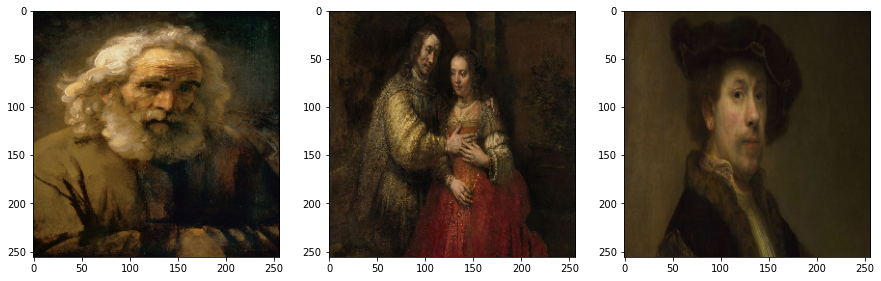

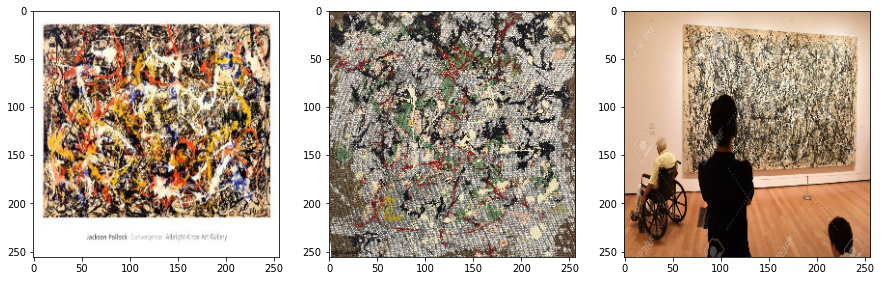

In [2]:
WIDTH=256
HEIGHT=256
LAYERS=3 #RGB
image_size = (WIDTH,HEIGHT)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    labels="inferred", # Take images from both directories
    validation_split=0.2, # 20% Goes to validation
    subset="training",
    seed=1337,
    image_size=image_size,
    shuffle=True,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    labels="inferred", # Take images from both directories
    validation_split=0.2, # 20% Goes to validation
    subset="validation",
    seed=1337,
    image_size=image_size,
    shuffle=True,
)

plt.figure(figsize=(15,5))
cnt = 1;
for images, labels in train_ds.take(1):
    for idx, label in enumerate(labels):
        if label==1: 
            plt.subplot(1,3,cnt)
            plt.imshow(images[idx]/255)
            cnt+=1
        if cnt>3: break;

plt.figure(figsize=(15,5))
cnt = 1;
for images, labels in train_ds.take(1):
    for idx, label in enumerate(labels):
        if label==0: 
            plt.subplot(1,3,cnt)
            plt.imshow(images[idx]/255)
            cnt+=1
        if cnt>3: break;


In [3]:
# Build the model
def build_model(image_width, image_height, image_depth):
    input_layer = tf.keras.layers.Input(shape=[image_width, image_height, image_depth])

    # FIRST CONVOLUTIONAL GROUP
    layers = tf.keras.layers.Conv2D(filters=16,
                                kernel_size=(3,3),
                                padding="same",
                                activation="tanh")(input_layer)
    layers = tf.keras.layers.MaxPool2D(pool_size=(2,2))(layers)
    layers = tf.keras.layers.ReLU()(layers)

    # SECOND CONVOLUTIONAL GROUP
    layers = tf.keras.layers.Conv2D(filters=16,
                                kernel_size=(3,3),
                                padding="same",
                                activation="tanh")(layers)
    layers = tf.keras.layers.MaxPool2D(pool_size=(2,2))(layers)
    layers = tf.keras.layers.ReLU()(layers)

    # FULLY CONNECTED LAYER + FLATTENING REQUIRED
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(128, activation="tanh")(layers)

    # OUTPUT LAYER [1 NEURON]
    output_layer = tf.keras.layers.Dense(1, activation="sigmoid")(layers)

    model = tf.keras.Model(inputs=input_layer,
                        outputs=output_layer,
                        name="RembrantPollockClassifier",
                        )
    
    return model

# Build a new model
model = build_model(WIDTH, HEIGHT, LAYERS)
model.summary()

Model: "RembrantPollockClassifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
re_lu (ReLU)                 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 6

In [4]:
# The model is built but bust be compiled with the proper optimizer and loss function
model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [6]:
#TRAINING PARAMETERS
batch_size = 10
epochs = 100

train_ds.batch_size = batch_size
val_ds.batch_size = batch_size

%load_ext tensorboard
import datetime
#!rm -rf ./logs/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


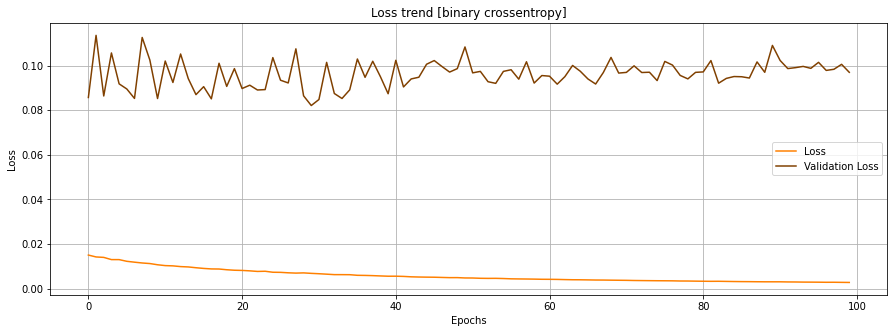

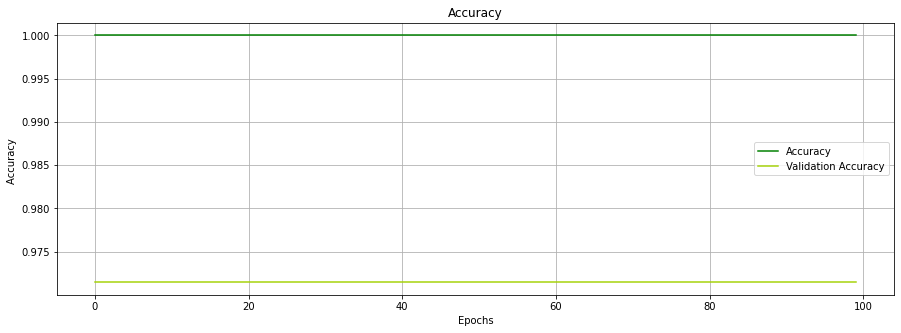

In [71]:
plt.figure(figsize=(15,5))
plt.plot(history.history["loss"],color='#ff8000',label='Loss')
plt.plot(history.history["val_loss"],color='#804000',label='Validation Loss')
plt.title('Loss trend [binary crossentropy]')
plt.grid(True)
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(history.history["acc"],color='#008000',label='Accuracy')
plt.plot(history.history["val_acc"],color='#a5d209',label='Validation Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.xlabel("Epochs"); plt.ylabel("Accuracy ")
plt.legend()

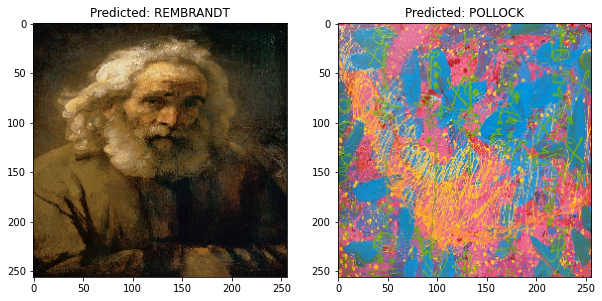

In [92]:
img = tf.keras.preprocessing.image.load_img(
    "test_rembrandt.jpg", target_size=image_size
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(np.asarray(img))
if model.predict(img_array)[0]>0.5:
    plt.title("Predicted: REMBRANDT")
else:
    plt.title("Predicted: POLLOCK")

img = tf.keras.preprocessing.image.load_img(
    "test_pollock.bmp", target_size=image_size
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

plt.subplot(1,2,2)
plt.imshow(np.asarray(img))
if model.predict(img_array)[0]>0.5:
    plt.title("Predicted: REMBRANDT")
else:
    plt.title("Predicted: POLLOCK")

